# Importing Necessary Libraries

In [67]:
import random
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# Data Collection/Creation

In [68]:
random.seed(42)
num_samples = 500

customer_data = {
    'CustomerID': [1000 + i for i in range(num_samples)],
    'Age': [random.randint(18, 70) for _ in range(num_samples)],
    'Gender': [random.choice(['Male', 'Female']) for _ in range(num_samples)],
    'MaritalStatus': [random.choice(['Married', 'Single', 'Divorced']) for _ in range(num_samples)],
    'AnnualIncome (USD)': [random.randint(30000, 120000) for _ in range(num_samples)],
    'TotalPurchases': [random.randint(1, 30) for _ in range(num_samples)],
    'PreferredCategory': [random.choice(['Electronics', 'Appliances']) for _ in range(num_samples)]
}

df = pd.DataFrame(customer_data)
df.to_csv('TechElectro_Customer_Data.csv', index=False)

print("Dataset generated and saved.")

Dataset generated and saved.


# Data Cleaning

In [69]:
print("Number of missing values before cleaning:")
print(df.isnull().sum())

Number of missing values before cleaning:
CustomerID            0
Age                   0
Gender                0
MaritalStatus         0
AnnualIncome (USD)    0
TotalPurchases        0
PreferredCategory     0
dtype: int64


hence no need to fill data or drop samples.

In [70]:
# Handling duplicates
print("Number of duplicate rows before cleaning are -> ", df.duplicated().sum())

Number of duplicate rows before cleaning are ->  0


hence no need to drop samples either

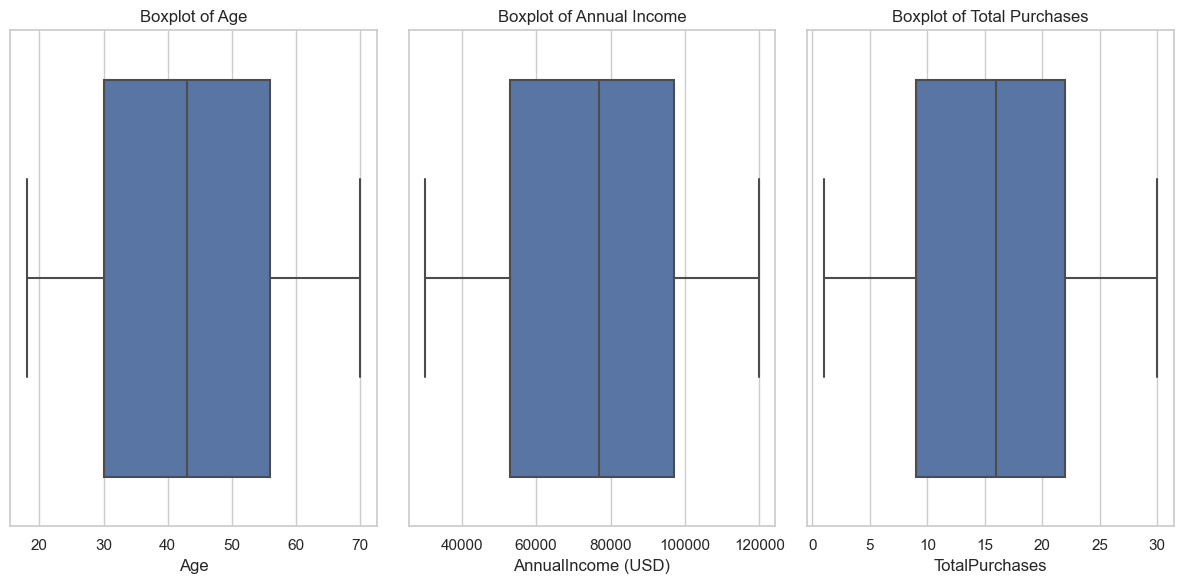

In [71]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
sns.boxplot(x=df['Age'])
plt.title('Boxplot of Age')

plt.subplot(1, 3, 2)
sns.boxplot(x=df['AnnualIncome (USD)'])
plt.title('Boxplot of Annual Income')

plt.subplot(1, 3, 3)
sns.boxplot(x=df['TotalPurchases'])
plt.title('Boxplot of Total Purchases')

plt.tight_layout()
plt.show()

In [72]:
# Handling outliers using IQR method
def remove_outliers(column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

numeric_columns = ['Age', 'AnnualIncome (USD)', 'TotalPurchases']
for column in numeric_columns:
    df = remove_outliers(column)

print("outliers removed using IQR method.")    

outliers removed using IQR method.


If there were outliers in our dataset we could've easily removed them using the above function.

It wasn't needed here, but I wrote the function just in case.

In [73]:
cleaned_file_path = 'Cleaned_TechElectro_Customer_Data.csv'
df.to_csv(cleaned_file_path, index=False)

print("\nData cleaning complete.", cleaned_file_path)


Data cleaning complete. Cleaned_TechElectro_Customer_Data.csv


# Data Preprocessing

In [74]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

df = pd.read_csv('TechElectro_Customer_Data.csv')

# Feature Scaling using StandardScaler
scaler = StandardScaler()
numeric_columns = ['Age', 'AnnualIncome (USD)', 'TotalPurchases']
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

# Normalization using MinMaxScaler
scaler = MinMaxScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

# Encoding categorical variables using LabelEncoder
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['MaritalStatus'] = label_encoder.fit_transform(df['MaritalStatus'])
df['PreferredCategory'] = label_encoder.fit_transform(df['PreferredCategory'])

preprocessed_file_path = 'Preprocessed_TechElectro_Customer_Data.csv'
df.to_csv(preprocessed_file_path, index=False)
print("\nData preprocessing complete.")


Data preprocessing complete.


# EDA

Summary Statistics:
        CustomerID         Age  AnnualIncome (USD)  TotalPurchases
count   500.000000  500.000000          500.000000      500.000000
mean   1249.500000   42.860000        76083.486000       15.386000
std     144.481833   15.244579        25707.550841        8.172305
min    1000.000000   18.000000        30205.000000        1.000000
25%    1124.750000   30.000000        52896.750000        9.000000
50%    1249.500000   43.000000        76797.000000       16.000000
75%    1374.250000   56.000000        97187.000000       22.000000
max    1499.000000   70.000000       119838.000000       30.000000


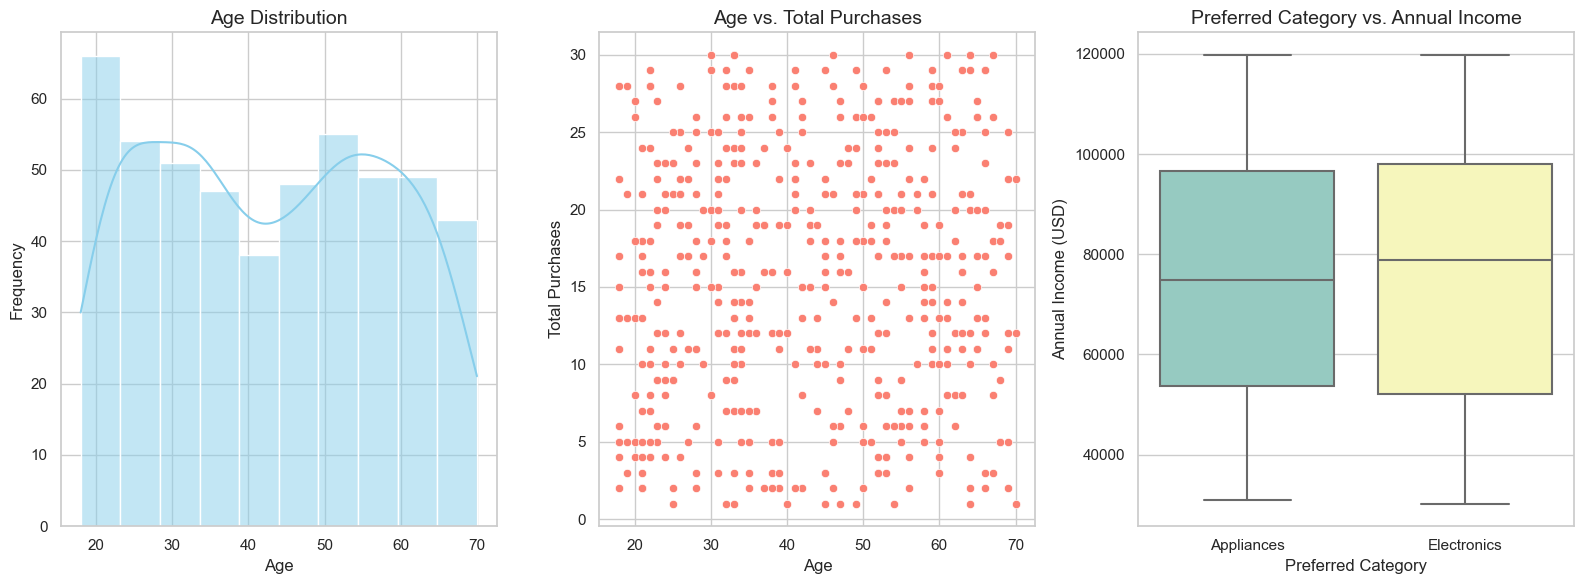

C:\Users\momin\AppData\Local\Temp\ipykernel_63872\3982594908.py:33: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


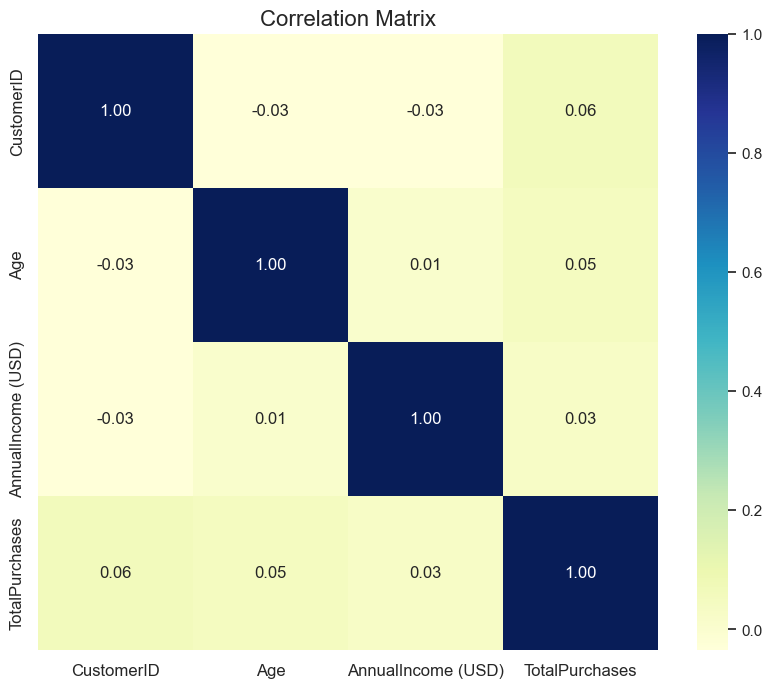

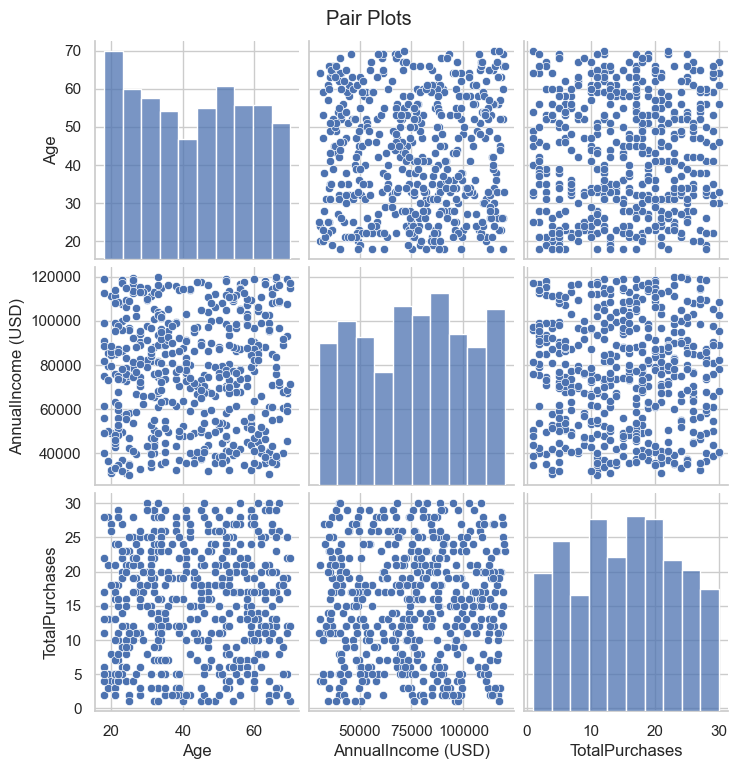

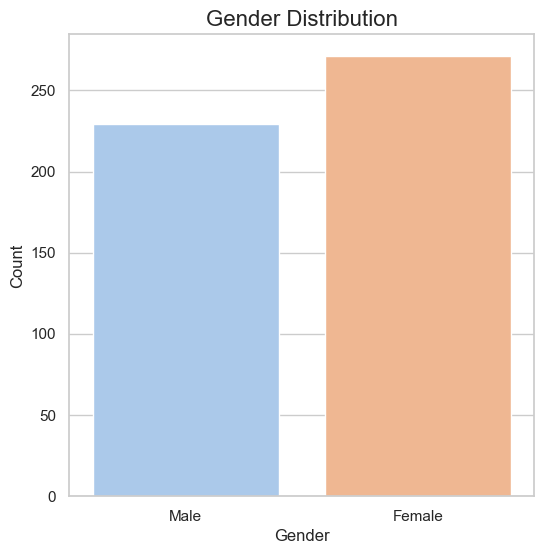

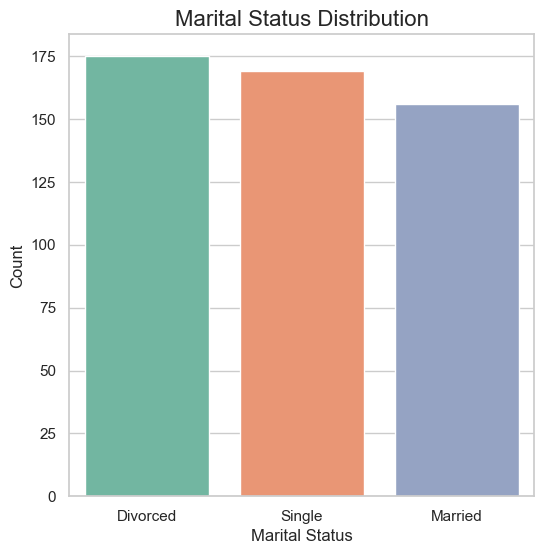

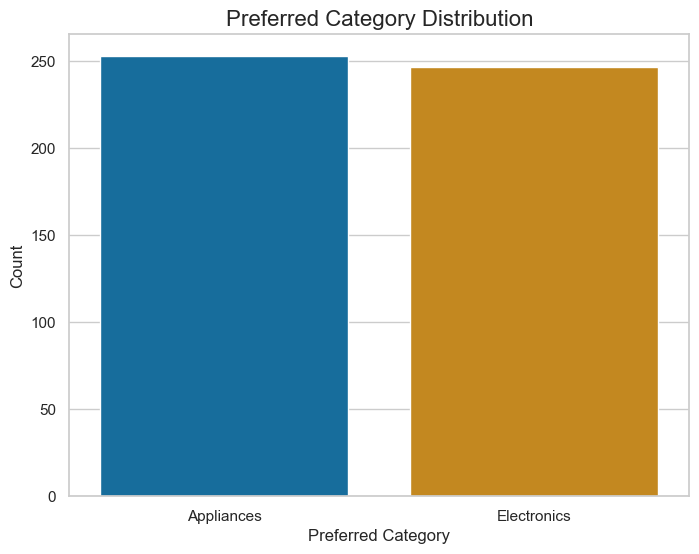

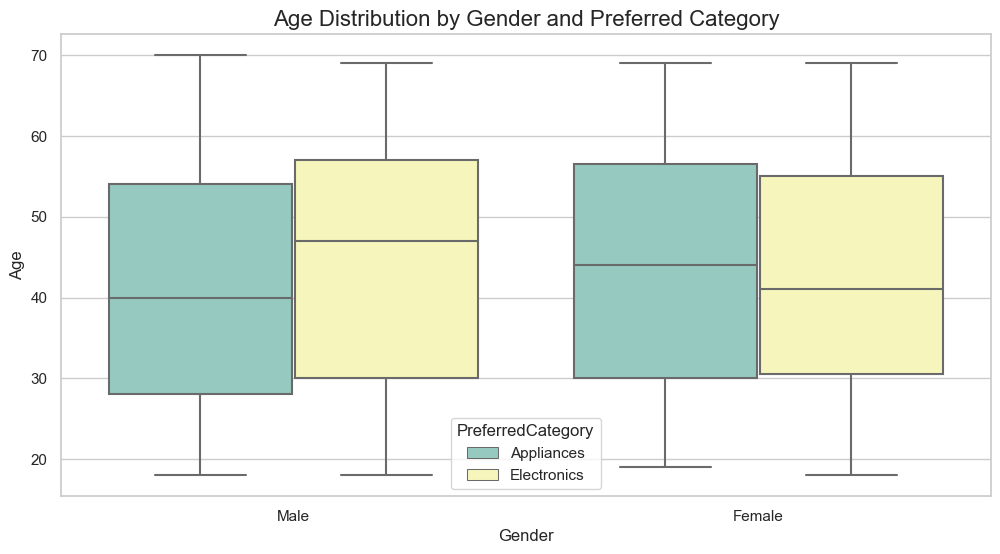

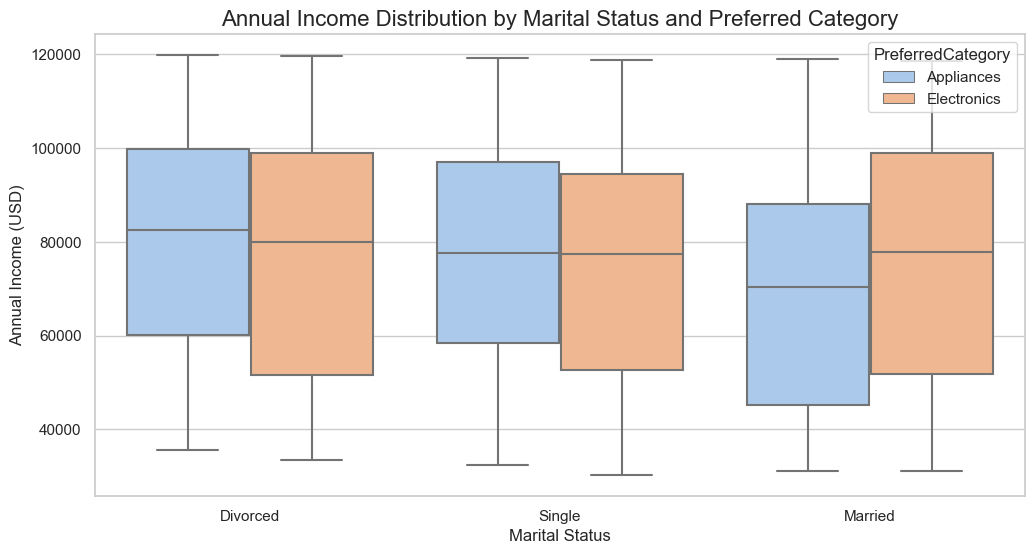

In [75]:
df = pd.read_csv('Cleaned_TechElectro_Customer_Data.csv')

# Summary statistics
summary = df.describe()
print("Summary Statistics:")
print(summary)

# Visualizing distributions and relationships
plt.figure(figsize=(16, 6))

plt.subplot(1, 3, 1)
sns.histplot(data=df, x='Age', kde=True, color='skyblue')
plt.title('Age Distribution', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.subplot(1, 3, 2)
sns.scatterplot(data=df, x='Age', y='TotalPurchases', color='salmon')
plt.title('Age vs. Total Purchases', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Total Purchases', fontsize=12)

plt.subplot(1, 3, 3)
sns.boxplot(data=df, x='PreferredCategory', y='AnnualIncome (USD)', palette='Set3')
plt.title('Preferred Category vs. Annual Income', fontsize=14)
plt.xlabel('Preferred Category', fontsize=12)
plt.ylabel('Annual Income (USD)', fontsize=12)

plt.tight_layout()
plt.show()

# Correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title('Correlation Matrix', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Pair plots
pair_plot_columns = ['Age', 'AnnualIncome (USD)', 'TotalPurchases']
sns.pairplot(df[pair_plot_columns])
plt.suptitle("Pair Plots", y=1.02)
plt.show()

# Gender distribution
plt.figure(figsize=(6, 6))
sns.countplot(data=df, x='Gender', palette='pastel')
plt.title('Gender Distribution', fontsize=16)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

# Marital status distribution
plt.figure(figsize=(6, 6))
sns.countplot(data=df, x='MaritalStatus', palette='Set2')
plt.title('Marital Status Distribution', fontsize=16)
plt.xlabel('Marital Status', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

# Preferred category distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='PreferredCategory', palette='colorblind')
plt.title('Preferred Category Distribution', fontsize=16)
plt.xlabel('Preferred Category', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

# Age distribution by gender and preferred category
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Gender', y='Age', hue='PreferredCategory', palette='Set3')
plt.title('Age Distribution by Gender and Preferred Category', fontsize=16)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Age', fontsize=12)
plt.show()

# Annual income distribution by marital status and category preference
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='MaritalStatus', y='AnnualIncome (USD)', hue='PreferredCategory', palette='pastel')
plt.title('Annual Income Distribution by Marital Status and Preferred Category', fontsize=16)
plt.xlabel('Marital Status', fontsize=12)
plt.ylabel('Annual Income (USD)', fontsize=12)
plt.show()

## We can notice from the summary :

### average age age is 43 approx. majority of customers fall within the age range of 30 to 56 years. age distribution seems to be relatively evenly spread across the range.

### Average annual income of customers is around $76,083 USD.The income distribution shows that customers have a wide range of income levels, from a minimum of $30,205 USD to a maximum of $119,838 USD.

### On average, customers have made approximately 15 purchases. The minimum number of purchases is 1, and the maximum is 30.

### According to Summary Statistics and HeatMap and pairplots, There is no direct relationship/correlation between Age and income and Total Purchases.

### Females have made around 55% of the total purchases.

### Divorced people at top rank for most purchases followed by Singles which are followed by Married individuals.

### Appliances category has slightly more purchases.

## We can notice from the Heat Map (Correlation Matrix) that there is no correlation between all featues

c:\Users\momin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\momin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\momin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\momin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

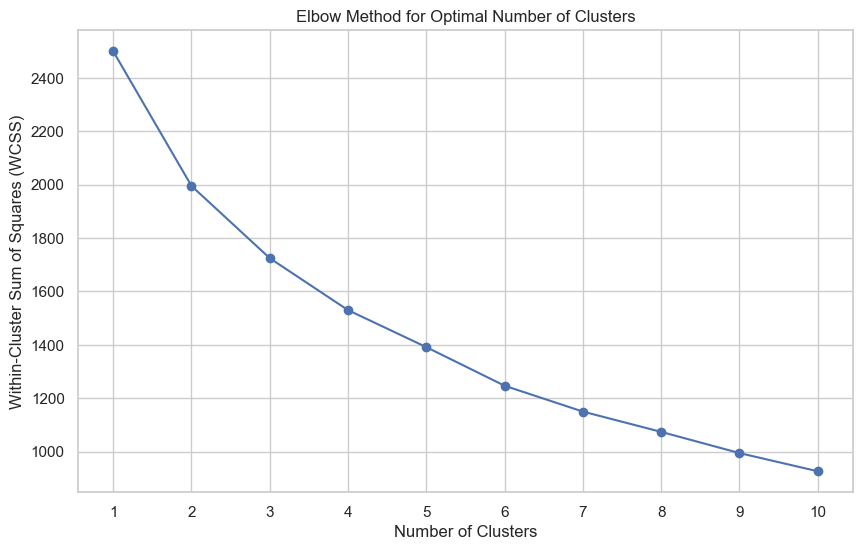

In [76]:
# Load the preprocessed dataset
df = pd.read_csv('Preprocessed_TechElectro_Customer_Data.csv')

# Select relevant features for clustering
features_for_clustering = ['Age', 'AnnualIncome (USD)', 'TotalPurchases', 'Gender', 'PreferredCategory']

# Standardize features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[features_for_clustering])

# Elbow method to find the optimal number of clusters
inertia = []
for num_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xticks(range(1, 11))
plt.show()

c:\Users\momin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


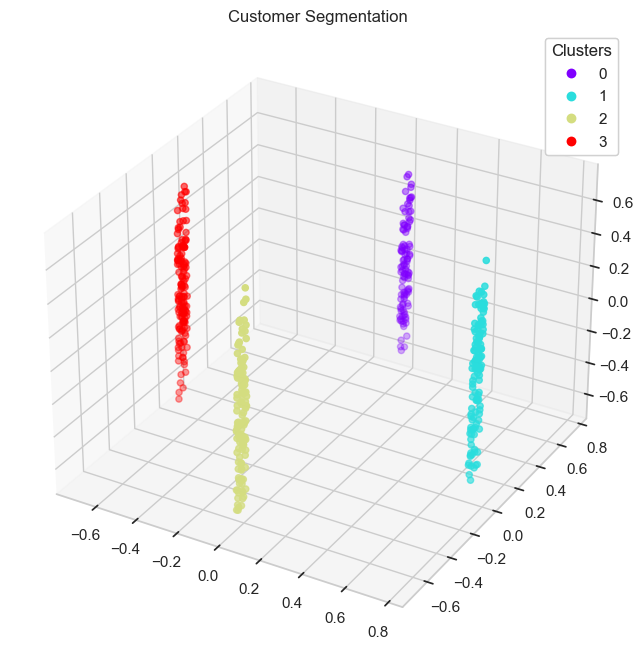

Number of points in each cluster:
0    106
1    123
2    124
3    147
Name: Cluster, dtype: int64


In [77]:
df = pd.read_csv('Preprocessed_TechElectro_Customer_Data.csv')

# features for clustering
features_for_clustering = ['Age', 'AnnualIncome (USD)', 'TotalPurchases', 'Gender', 'PreferredCategory']

# K-means clustering
num_clusters = 4  # You can adjust the number of clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(df[features_for_clustering])

pca = PCA(n_components=3)
pca_result = pca.fit_transform(df[features_for_clustering])
df['PCA1'] = pca_result[:, 0]
df['PCA2'] = pca_result[:, 1]
df['PCA3'] = pca_result[:, 2]


# Visualizing clusters using PCA
plt.figure(figsize=(10, 8))
ax = plt.axes(projection='3d')
scatter = ax.scatter3D(df['PCA1'], df['PCA2'], df['PCA3'], c=df['Cluster'], cmap='rainbow')
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)
ax.set_title('Customer Segmentation')
plt.show()

cluster_counts = df['Cluster'].value_counts().sort_index()
print("Number of points in each cluster:")
print(cluster_counts)

## Using Principal Component Analysis (PCA) and K-means Clustering, The data has been divided into four clusters based on customer attributes and preferences.

## These cluster sizes suggest that the dataset has been segmented into fairly balanced groups, with each cluster capturing a notable portion of the customer base